In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from keras.models import Sequential


Using TensorFlow backend.


In [2]:
train = pd.read_csv("/home/charmi/Documents/Small_Projects/Handwritten_digit_recognition/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv("/home/charmi/Documents/Small_Projects/Handwritten_digit_recognition/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
x_train = (train.iloc[:,1:].values)
y_train = train.iloc[:,0]
x_test = test.values

In [5]:
x_train[0:4, :]
#x_train.shape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
#y_train
y_train.shape

(42000,)

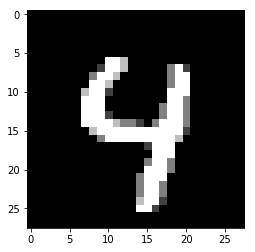

In [7]:
d = x_train[78]
d.shape=(28, 28)
#plt.imshow(225-d,cmap = 'gray')
plt.imshow(d, cmap='gray')

In [8]:
mean_trx = x_train.mean().astype(np.float32)
std_trx = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_trx)/std_trx

In [9]:
x_train = standardize(x_train)
x_train.shape

(42000, 784)

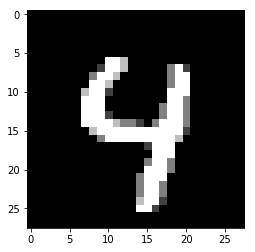

In [10]:
d = x_train[78]
d.shape=(28, 28)
#plt.imshow(225-d,cmap = 'gray')
plt.imshow(d, cmap='gray')

In [11]:
d = y_train[78]
print(d)

4


In [12]:
x_test = standardize(x_test)
x_test.shape

(28000, 784)

In [13]:
x_test = np.reshape(x_test, (x_test.shape[0], 28, 28))

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], 28, 28))

In [15]:
x_train.shape

(42000, 28, 28)

In [16]:
x_test.shape

(28000, 28, 28)

In [17]:
from keras.utils import np_utils
# convert list of labels to binary class matrix
y_train = np_utils.to_categorical(y_train) 

In [18]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [19]:
num_classes = y_train.shape[1]

In [20]:
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 1, 28, 28).astype('float32')

In [21]:
x_train.shape

(42000, 1, 28, 28)

In [22]:
x_train

array([[[[-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978],
         [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978],
         [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978],
         ...,
         [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978],
         [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978],
         [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978]]],


       [[[-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978],
         [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978],
         [-0.42462978, -0.42462978, -0.42462978, ..., -0.42462978,
          -0.42462978, -0.42462978],
         ...,
         [-0.42462978, -0.424629

In [23]:
x_test.shape

(28000, 1, 28, 28)

In [24]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(16, (5, 5), border_mode="same", input_shape=(1, 28, 28), activation='relu'))
	#model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(32, (5, 5), border_mode="same", activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(32, (5, 5), border_mode="same", activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
    
	#model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(32, activation='relu'))
	#model.add(Dense(50, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [25]:
# build the model
model = larger_model()
model.summary()

W0829 20:48:25.475708 140297664726848 deprecation_wrapper.py:119] From /home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (5, 5), input_shape=(1, 28, 28..., activation="relu", padding="same")`
W0829 20:48:29.267772 140297664726848 deprecation_wrapper.py:119] From /home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 20:48:30.261363 140297664726848 deprecation_wrapper.py:119] From /home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform ins

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 28, 28)        416       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 28, 28)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 14, 14)        25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 7, 7)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                50208     
__________

In [26]:
# Fit the model
model.fit(x_train, y_train, validation_split=0.13, epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model

preds = model.predict_classes(x_test, verbose=0)

def write_preds(preds, fname):
    pd.DataFrame({"ImageId": list(range(1,len(preds)+1)), "Label": preds}).to_csv(fname, index=False, header=True)

write_preds(preds, "keras-MaltiLayer_CNN-test5.csv")

W0829 20:48:45.229251 140297664726848 deprecation.py:323] From /home/charmi/miniconda3/envs/av/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 36540 samples, validate on 5460 samples
Epoch 1/10
 - 75s - loss: 0.3038 - acc: 0.9056 - val_loss: 0.0797 - val_acc: 0.9775
Epoch 2/10
 - 64s - loss: 0.0712 - acc: 0.9792 - val_loss: 0.0647 - val_acc: 0.9806
Epoch 3/10
 - 65s - loss: 0.0471 - acc: 0.9854 - val_loss: 0.0519 - val_acc: 0.9850
Epoch 4/10
 - 64s - loss: 0.0347 - acc: 0.9892 - val_loss: 0.0494 - val_acc: 0.9852
Epoch 5/10
 - 65s - loss: 0.0268 - acc: 0.9915 - val_loss: 0.0471 - val_acc: 0.9864
Epoch 6/10
 - 64s - loss: 0.0235 - acc: 0.9921 - val_loss: 0.0571 - val_acc: 0.9844
Epoch 7/10
 - 64s - loss: 0.0191 - acc: 0.9939 - val_loss: 0.0562 - val_acc: 0.9864
Epoch 8/10
 - 64s - loss: 0.0146 - acc: 0.9952 - val_loss: 0.0525 - val_acc: 0.9874
Epoch 9/10
 - 64s - loss: 0.0136 - acc: 0.9956 - val_loss: 0.0445 - val_acc: 0.9896
Epoch 10/10
 - 64s - loss: 0.0117 - acc: 0.9960 - val_loss: 0.0623 - val_acc: 0.9863
